Mean Squared Error: 5718.136045556693
R-squared: 0.4917811449716891
Next 30 days predicted stock prices:
            Predicted_Close
2024-06-25      1433.106095
2024-06-26      1431.525331
2024-06-27      1429.933798
2024-06-28      1428.331492
2024-06-29      1426.718416
2024-06-30      1425.094568
2024-07-01      1423.459949
2024-07-02      1421.814558
2024-07-03      1420.158396
2024-07-04      1418.491463
2024-07-05      1416.813758
2024-07-06      1415.125282
2024-07-07      1413.426034
2024-07-08      1411.716015
2024-07-09      1409.995224
2024-07-10      1408.263662
2024-07-11      1406.521328
2024-07-12      1404.768221
2024-07-13      1403.004344
2024-07-14      1401.229695
2024-07-15      1399.444274
2024-07-16      1397.648081
2024-07-17      1395.841117
2024-07-18      1394.023380
2024-07-19      1392.194872
2024-07-20      1390.355592
2024-07-21      1388.505540
2024-07-22      1386.644716
2024-07-23      1384.773121
2024-07-24      1382.890752


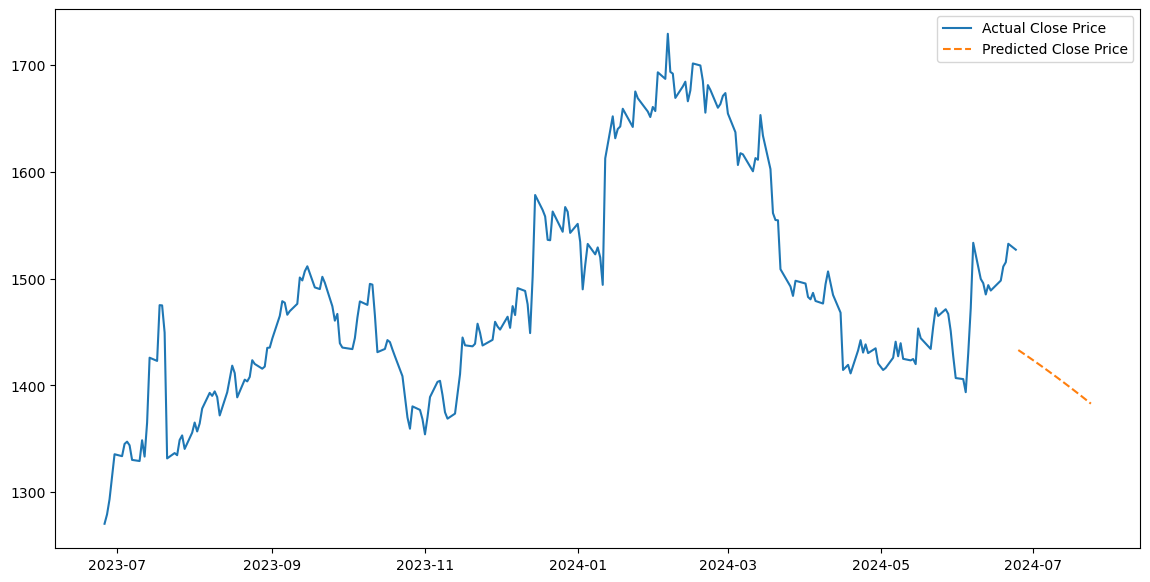

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data, degree=2):
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y = stock_data['Close'].values
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly, y, poly

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    return model

# Make future predictions
def make_predictions(stock_data, model, poly, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_dates_poly = poly.transform(future_dates_ordinals)
    future_predictions = model.predict(future_dates_poly)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')
    plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', linestyle='--')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "INFY.NS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X, y, poly = prepare_data(stock_data, degree=3)  # Change the degree as needed
    
    model = train_and_evaluate_model(X, y)
    future_data = make_predictions(stock_data, model, poly, days=30)
    
    # Print future predictions
    print("Next 30 days predicted stock prices:")
    print(future_data)
    
    plot_results(stock_data, future_data)